In [19]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math
from IPython.display import clear_output

In [3]:
#Ejercicios Derivación

[]

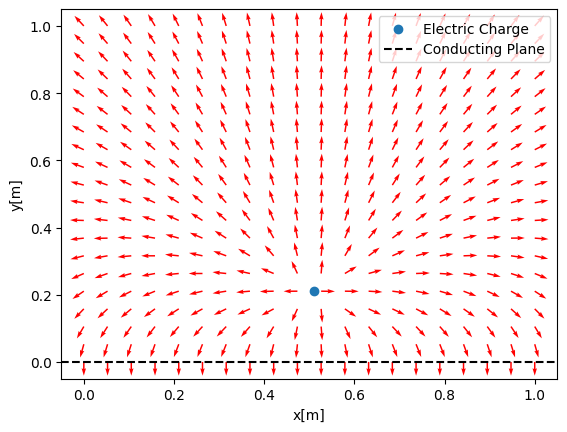

In [4]:
# 7. Electrodinámica

# a.
r_q = np.array([0.51, 0.21])
x = np.linspace(0,1,20)
y = np.linspace(0,1,20)
X, Y = np.meshgrid(x,y)

def PotencialElectrico(x,y):
    return 1/np.sqrt((x-r_q[0])**2 + (y-r_q[1])**2) - (1/np.sqrt((x-r_q[0])**2 + (y+r_q[1])**2))

def DerivadaParcialX(f,x,y,h=0.05):
    return (f(x+h,y) - f(x-h,y))/(2*h)

def DerivadaParcialY(f,x,y,h=0.05):
    return (f(x,y+h) - f(x,y-h))/(2*h)

def Gradiente(f,x,y):
    return np.array([(DerivadaParcialX(f,x,y)), DerivadaParcialY(f,x,y)])

CampoElectrico = -Gradiente(PotencialElectrico, X, Y)

#b.
Ex = CampoElectrico[0]
Ey = CampoElectrico[1]

Norma = np.sqrt(Ex**2 + Ey**2)

Norma[Norma == 0] = 1
Ex_N = Ex / Norma
Ey_N = Ey / Norma

ax = plt.subplot()
ax.set_xlabel("x[m]")
ax.set_ylabel("y[m]")
ax.scatter(r_q[0], r_q[1], label="Electric Charge")
ax.axhline(y=0, color='black', linestyle='--', label='Conducting Plane')
ax.quiver(X, Y, Ex_N, Ey_N, color = "red")
ax.legend()
ax.plot()

In [5]:
# 7. Coeficientes (Interpolación)

#a. 
x = sym.Symbol("x",real=True)
#b.
h = sym.Symbol("h",real=True)
#c.
X=[-1*h,0*h,3*h]
#d.

def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

#e. 

def GetCoefficients(x,p,X):
    Coefficients = []
    for i in range(len(X)):
       Li = Lagrange(x,X,i)
       dLi = sym.diff(Li,x,1)
       C = dLi.subs(x, X[p])
       Coefficients.append(C)
    return Coefficients
Coefficients = GetCoefficients(x,1,X)
Coefficients 

[-3/(4*h), 2/(3*h), 1/(12*h)]

In [6]:
# Para sacar coeficientes de derivada central alrededor de un x=0:
x=sym.Symbol("x", real=True)
X=[-1,1,3,4]

def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

bases=[]

for i in range(len(X)):
  bases.append(Lagrange(x, X, i))

dbases=[]

for i in range(len(bases)):
  f = bases[i]
  dbases.append(sym.diff(f,x,1))

coeficientes = []

for i in range(len(dbases)):
  coeficiente = dbases[i].subs(x,0)
  coeficientes.append(coeficiente)

coeficientes

  


[-19/40, 5/12, 1/8, -1/15]

In [7]:
#Ejercicios de Newton Raphson

In [8]:
def DerivadaCentral(f,x,h=1e-5):
    return (f(x+h)-f(x-h))/(2*h)

def NewtonRaphson(f, xn, i_max = 100, tolerancia=1e-10):
    error = 1
    i = 0
    xn1 = xn
    while error > tolerancia and i < i_max:
        try:
            xn1 = xn - f(xn)/DerivadaCentral(f,xn)
            error = np.abs(f(xn)/DerivadaCentral(f,xn))
        except ZeroDivisionError:
            pass
        xn = xn1
        i += 1
    if i == i_max:
        return False
    else:
        return xn
    
def GetAllRoots(f, x, tolerancia = 4):
    Roots = np.array([])
    for i in x:
        possible_root = NewtonRaphson(f,i)

        if possible_root != False:
            root = round(possible_root, tolerancia)
            if root not in Roots:
                Roots = np.append(Roots, root)

    Roots.sort()
    return Roots


In [9]:
#3.
x = np.linspace(-2,2,100)
def FuncionTres(x):
    return 3*x**5 + 5*x**4 - x**3

Raices = GetAllRoots(FuncionTres,x)
Raices #Ya funciona: cambio de tolerancia

array([-1.8471,  0.1805])

In [10]:
#4.
RaicesLegendre = {}
x=sym.Symbol("x", real=True)
X=np.linspace(-1,1,1000)

def Legendre(x,n):
    f = (x**2 - 1)**n
    Derivada = sym.diff(f,x,n)
    return (1/((2**n)*math.factorial(n)))*Derivada
for i in range(0,20):
    Poly_Legendre = Legendre(x,i)
    PLegendre = sym.lambdify([x],Poly_Legendre,"numpy")
    Raices = GetAllRoots(PLegendre, X)
    RaicesLegendre[f"Raices de p{i}"] = Raices
RaicesLegendre
    

    



{'Raices de p0': array([], dtype=float64),
 'Raices de p1': array([], dtype=float64),
 'Raices de p2': array([-0.5774,  0.5774]),
 'Raices de p3': array([-0.7746,  0.    ,  0.7746]),
 'Raices de p4': array([-0.8611, -0.34  ,  0.34  ,  0.8611]),
 'Raices de p5': array([-0.9062, -0.5385,  0.    ,  0.5385,  0.9062]),
 'Raices de p6': array([-0.9325, -0.6612, -0.2386,  0.2386,  0.6612,  0.9325]),
 'Raices de p7': array([-0.9491, -0.7415, -0.4058,  0.    ,  0.4058,  0.7415,  0.9491]),
 'Raices de p8': array([-0.9603, -0.7967, -0.5255, -0.1834,  0.1834,  0.5255,  0.7967,
         0.9603]),
 'Raices de p9': array([-0.9682, -0.836 , -0.6134, -0.3243,  0.    ,  0.3243,  0.6134,
         0.836 ,  0.9682]),
 'Raices de p10': array([-0.9739, -0.8651, -0.6794, -0.4334, -0.1489,  0.1489,  0.4334,
         0.6794,  0.8651,  0.9739]),
 'Raices de p11': array([-0.9782, -0.8871, -0.7302, -0.5191, -0.2695,  0.    ,  0.2695,
         0.5191,  0.7302,  0.8871,  0.9782]),
 'Raices de p12': array([-0.9816, -

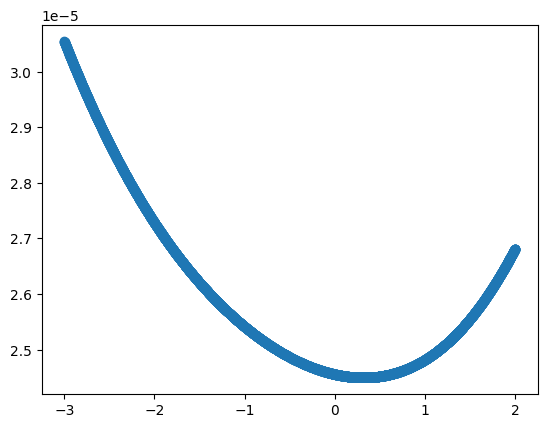

In [11]:
#6.
#a) 
def TiempoViaje(x):
    return (((x+3)**2 + 4)**(1/2) + 1.33*((x-2)**2 + 4)**(1/2))/300000
#b)
X = np.linspace(-3,2,5000)
t = TiempoViaje(X)
plt.scatter(X,t)

In [12]:
#c)
def SegundaDerivadaCentral(f,x,h=1e-5):
    return (f(x+h) - 2*f(x) + f(x-h))/(h**2)

def NewtonRaphsonC(f, xn, i_max = 1000, tolerancia=1e-6):
    error = 1
    i = 0
    xn1 = xn
    while error > tolerancia and i < i_max:
        try:
            xn1 = xn - DerivadaCentral(f,xn)/SegundaDerivadaCentral(f,xn)
            error = np.abs(DerivadaCentral(f,xn)/SegundaDerivadaCentral(f,xn))
        except ZeroDivisionError:
            pass
        xn = xn1
        i += 1
    if i == i_max:
        return False
    else:
        return xn
    
def GetAllRootsC(f, x, tolerancia = 6):
    Roots = np.array([])
    for i in x:
        possible_root = NewtonRaphsonC(f,i)

        if possible_root != False:
            root = round(possible_root, tolerancia)
            if root not in Roots:
                Roots = np.append(Roots, root)

    Roots.sort()
    return Roots

PuntoCritico = GetAllRootsC(TiempoViaje,X)
PuntoCritico = float(PuntoCritico[0])
TiempoMinimo = TiempoViaje(PuntoCritico)
TiempoMinimo

2.449931892295416e-05

In [13]:
#d.
tan_alpha0 = -(PuntoCritico+3)/2
alpha0 = np.arctan(tan_alpha0)
tan_alpha1 = -(2-PuntoCritico)/2
alpha1 = np.arctan(tan_alpha1)
alpha0, alpha1


(np.float64(-1.0281947168333185), np.float64(-0.6995661461507848))

In [14]:
#e.
1/1.33, np.sin(alpha1)/np.sin(alpha0)
#Si se cumple la ley de Snell

(0.7518796992481203, np.float64(0.7518796210675457))

In [15]:
#Ejercicios de descenso del gradiente

In [16]:
def Plotter(e):

  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  ax.set_title('{:.0f}'.format(e),fontsize=10)

  return fig,ax

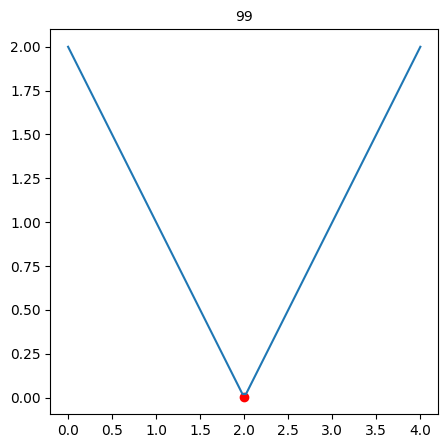

In [20]:
def f(x):
    return np.abs(x-2)

xvalues = np.linspace(0,4,100)
yvalues = f(xvalues)
# Programemos la funcion de descenso
def GradientDescent(f,epochs=100,lr=0.01,tolerancia=1e-4):

  # AJustar la semilla
  x = np.random.uniform(0,4)

  for e in range(epochs):

    #Algorithm
    x1  = x - lr*DerivadaCentral(f,x)

    if np.abs(x1 - x) < tolerancia:
      break

    x = x1

    # Plotting stuff
    clear_output(wait=True)
    _,ax = Plotter(e)

    ax.plot(xvalues,yvalues)

    ax.scatter(x,f(x),color='r')

    plt.show()

GradientDescent(f)
#No es posible porque la función no es derivable en el mínimo